# Summer 2022 Data Science Intern Challenge

### Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

Data cleaning is one of the most important steps for any orgranization before decision-making based on those data. To anawer the Question -1, I will go each and every steps to varify the Average Order Value (AOV) and justify it.

Firstly, let's read the dataset with `Pandas` in `python3`.

In [1]:
import pandas as pd
dataset = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

# Showing 5 rows from the dataset
dataset.head(n = 5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


From the above table, we can infer the following features from the column names:
- `order_id`: ID for each of the order placed. `datatype`: int 
- `shop_id`: ID for specific shops. `datatype`: int
- `user_id`: ID for specific users. `datatype`: int
- `order_amount`: Amount of the specific order. `datatype`: float
- `total_items`: Number of items in a particular order. `datatype`: int
- `payment_method`: Method of payment while placing the order. `datatype`: string
- `created_at`: Time of placing the order. `datatype`: datetime

Now, we will check for incorrectly formatted, duplicate, or incomplete data within our dataset. We can check for missing data in our dataset as follows:

In [2]:
dataset.isnull().any().any()

False

From the above output, we can see that all cells in the table are `false` i.e. there is no standard `NaN`, empty or missing values in the dataset. However, there can be some non-standard missing values like `n/a`, `NA`, `--`, `na`. Let's check for those as follows.

In [3]:
non_standard_missing_values = ['n/a', 'NA', '--', 'na']
dataset = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv', na_values=non_standard_missing_values)
dataset.isnull().any().any()

False

In [4]:
dataset.isna().any().any()

False

From the above result, we can conclude that there is no missing values in our dataset. Now, we can check for duplicate data in the dataset.

In [5]:
dataset.duplicated(subset=None, keep='first').any()

False

So, there is no duplicate data in our dataset. So, we can now start analyzing our data. 

#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
In this step, we will calculate the mean of the `order_amount` which is the Average order value (AOV) in this case. Apart from that, we will calculate the median of the oder_amount.

In [6]:
print("Mean of Order Amount or AOV: ", dataset['order_amount'].mean())
print("Median of the Order Amount: ", dataset['order_amount'].median())

Mean of Order Amount or AOV:  3145.128
Median of the Order Amount:  284.0


From the above mean and median, we can see that the distance between the mean and the median is huge. So, we can suspect that, there is something wrong in our data. To understand, the summary of our dataset, lets try to summaries our dataset.

In [7]:
dataset['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From the above summary, we can say that there are some serious issues on the `order_amount` because Standard Deviation (std) of `order_amount` is **41282.539349**, which is very large compared to the mean. Which can be interpreted as the order amount spreaded over an extreme wide range though 75% of the oders are within 390.0. So, we can conclude that there are some outliers in our dataset for order amount. To detect the outlier, let's plot the total items vs order amount for the dataset.

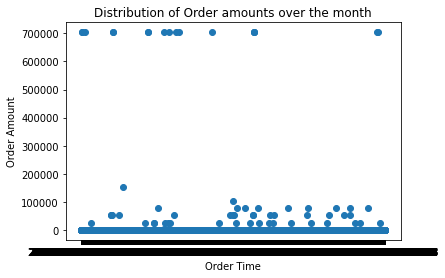

In [8]:
import matplotlib.pyplot as plt
def data_show(dataset, title):
    plt.scatter(x = dataset['created_at'], y = dataset['order_amount'])
    plt.xlabel('Order Time')
    plt.ylabel('Order Amount')
    plt.title(title)
    plt.show()


data_show(dataset, "Distribution of Order amounts over the month")


From the above Figure, we can see that there are some orders in which order amount are more than 700000. As mentioned in the problem statement, those shopes sell relatively affordable items. Apart from that, those shopes sell only one type of shoe. So, in a single order, selling 700000 in a single order is quite unlikely. Apart from that, one order amount is more than 150000 where as most of the order amounts are near to 100000. So, those datas can be anomaly in our dataset.

To analyze more, lets show the shop_ids of those orders.

In [9]:
print(dataset[dataset['order_amount'] > 150000]['shop_id'].unique())

[42 78]


So, we can see that only two shops are skewing the distribution of our AOV. To analyze more, lets analyze the orders of those two shops one by one.

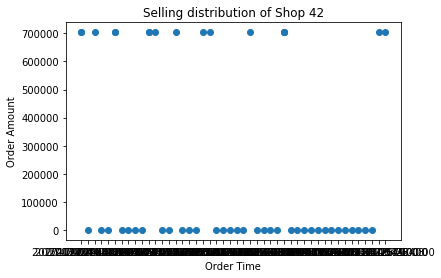

In [10]:
data_show(dataset[dataset['shop_id'] == 42], title = "Selling distribution of Shop 42")

***Shop ID 42*** is selling unusually than the other stores. We can see the per unit price of this store.

In [11]:
print((dataset[dataset['shop_id'] ==42 ]['order_amount'] / dataset[dataset['shop_id'] ==42]['total_items']).unique())

[352.]


So, for **shop id 42**, we can say they may ***selling bulk*** amount of shoes in a single order. However, we know shops are ordinary shops and they sell affordable shoes. It's also questionable that they are selling a single pair of shoes of cost $352 which is also unusal.

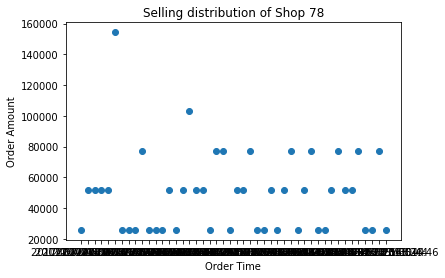

In [12]:
data_show(dataset[dataset['shop_id'] == 78],
          title="Selling distribution of Shop 78")

In [13]:
print((dataset[dataset['shop_id'] == 78]['order_amount'] /
      dataset[dataset['shop_id'] == 78]['total_items']).unique())

[25725.]


From the above analysis of **Shop Id 78**, we see that this store selling a single pair shoe at $25725.0 which is questionable. So, this store oders are anomaly for our dataset.


In conclusion, we are going to remove those two stores from our dataset to calculate our AOV.

In [14]:
dataset_cleaned = dataset[(dataset['shop_id'] != 42)
                          & (dataset['shop_id'] != 78)]
print('Mean of the order amount or AOV: ', dataset_cleaned['order_amount'].mean())
print('Median of the order amount: ',
      dataset_cleaned['order_amount'].median())


Mean of the order amount or AOV:  300.1558229655313
Median of the order amount:  284.0


So, without those two store oders, our AOV seems quit in the right track and it's about $300.15.

#### b. What metric would you report for this dataset?

It's difficult to say that one fits to all. For reporting any data, we need to analyze different metrics in different situation. Average Oder Value (AOV) in this case does not seems promozing because some orders and the order amount made it skewed. However, if we consider the premium products in our stores and bluk amount of sells, then AOV doesn't give us that much sense. Howver, if we anaylyze the Median Order Value in this case, we may get some insight.

Depending on the order_amount those skewed the AOV, the can categories the main problem into two diffent types as follows:
- Bluk Sell: If there is a bulk amount of sell.
    - Define some range or categories depending on the `total_items` and report the AOV.
- Premium Product: If a store sell premium collection of items, it will skew our AOV.
    - To solve this issue, we can report the **Median Order Value (MOV)** addition to the Average/Mean Order Value while categorizing by total items. We can also add the Standard Deviation to understand which category skewing the dataset in AOV.

#### c. What is its value?

**Categorized by Total Items:**

In [15]:
categorizedTotalItems = dataset.groupby(
    'total_items')['order_amount'].mean().reset_index(name='AOV')
print(categorizedTotalItems)


   total_items            AOV
0            1     417.364481
1            2     750.215066
2            3    1191.076514
3            4     947.686007
4            5     759.350649
5            6   17940.000000
6            8    1064.000000
7         2000  704000.000000


From the above output, we can see the value of Average Order Value categorized by total items.

**Median Order Value:**

In [16]:
median = dataset.groupby(
    'total_items')['order_amount'].median().reset_index(name='MOV')['MOV']
std = dataset.groupby(
    'total_items')['order_amount'].std().reset_index(name='STD')['STD']
categorizedTotalItems['MOV'] = median
categorizedTotalItems['STD'] = std
print(categorizedTotalItems)


   total_items            AOV       MOV           STD
0            1     417.364481     153.0   2593.090627
1            2     750.215066     306.0   4760.572162
2            3    1191.076514     459.0   7471.160149
3            4     947.686007     592.0   5977.632918
4            5     759.350649     765.0    161.174453
5            6   17940.000000     948.0  51153.864136
6            8    1064.000000    1064.0           NaN
7         2000  704000.000000  704000.0      0.000000


From the above output, we see the Median Order Value (MOV) and the Standard Deviation of the dataset categorized by total items. However, for the total items of 8, there was only one order, that's the reason of NaN value of STD. Apart from that, for total items of 2000, all the orders are 704000.0, so the STD is 0.

### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a. How many orders were shipped by Speedy Express in total?

```sql
SELECT ShipperName, COUNT(Orders.ShipperID)
FROM Orders, Shippers WHERE Orders.ShipperID = Shippers.ShipperID AND Orders.ShipperID IN(SELECT Shippers.ShipperID FROM Shippers WHERE Shippers.ShipperName="Speedy Express")
```

**Output:**
|ShipperName	| COUNT(Orders.ShipperID) |
|-------------------|-------------------|
| Speedy Express|	        54 |

#### b. What is the last name of the employee with the most orders?

```sql
SELECT Orders.EmployeeID, Employees.LastName, COUNT(Employees.LastName) FROM (Orders, Employees) WHERE (Orders.EmployeeID = Employees.EmployeeID) GROUP BY Orders.EmployeeID ORDER BY COUNT(Employees.LastName) DESC;
```
**Output:**

| EmployeeID |	LastName |	COUNT(Employees.LastName)|
|------------|-----------|---------------------------|
|4	| Peacock|	40|
|3	| Leverling|	31|
|1	|Davolio|	29|
|8|	Callahan|	27|
|2|	Fuller	|20|
|6|	Suyama	|18|
|7|	King	|14|
|5|	Buchanan	|11|
|9|	Dodsworth	|6|


So, the most frequent LastName with `Orders' is the `Peacock`.

#### c. What product was ordered the most by customers in Germany?

```sql
SELECT ProductName, MAX(ProductCount), Country FROM (SELECT Products.ProductName as ProductName, COUNT(Products.ProductName) as ProductCount, Customers.Country as Country FROM (Orders, Customers, OrderDetails, Products) WHERE (Orders.CustomerID=Customers.CustomerID AND Orders.OrderID=OrderDetails.OrderID AND Products.ProductID=OrderDetails.ProductID AND Customers.Country = 'Germany') GROUP BY Products.ProductName Order by COUNT(Products.ProductName) Desc);
```

Output:
|ProductName|	MAX(ProductCount)|	Country|
|-----------|--------------------|---------|
|Gorgonzola Telino|	5	|Germany|

So, **Gorgonzola Telino** was the most frequent product ordered by cutomers in Germany.